In [209]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import date
%matplotlib inline
import scipy.stats as stats
import warnings

warnings.filterwarnings('ignore')

### BUSINESS PROBLEM-1

In [210]:
loan_data=pd.read_csv('/Users/arunbiretheesh/Desktop/DATA SCIENCE/CASE STUDY/Basic Statistics - Hypothesis Testing/LoansData.csv')

In [211]:
loan_data.columns=loan_data.columns.str.replace('.','_')
loan_data.Interest_Rate=loan_data.Interest_Rate.str.replace('%','')
loan_data.Interest_Rate=loan_data.Interest_Rate.astype('float64')

In [212]:
loan_data.dropna(subset=['Interest_Rate','Amount_Funded_By_Investors'],inplace=True)

In [213]:
loan_data.isnull().sum()

Amount_Requested                   0
Amount_Funded_By_Investors         0
Interest_Rate                      0
Loan_Length                        0
Loan_Purpose                       0
Debt_To_Income_Ratio               1
State                              0
Home_Ownership                     1
Monthly_Income                     1
FICO_Range                         2
Open_CREDIT_Lines                  3
Revolving_CREDIT_Balance           3
Inquiries_in_the_Last_6_Months     3
Employment_Length                 77
dtype: int64

In [214]:
#a. Intrest rate is varied for different loan amounts (Less intrest charged for high loan amounts)

In [215]:
# H0 - Interest rate inversely proportional to loan amt
# Ha - Interest rate directly proportional to loan amt
# 
# CI - 95%, p - 0.05

# perform the tes
stats.pearsonr( loan_data.Amount_Funded_By_Investors,loan_data.Interest_Rate) 
#print( stats.ttest_rel( loan_data.Amount_Funded_By_Investors,loan_data.Interest_Rate))
# based on p values, p value of the test is very small compared to cutoff p at 95%; 
# thus we will reject the H0

# business conclusion
# There is strong correlation between interest rate and Loan Amount
# claim is made at the CI of 95%

(0.33745400436759665, 1.4916862719480412e-67)

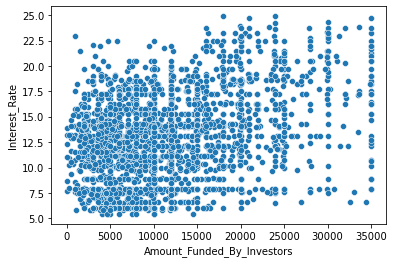

In [216]:
sns.scatterplot(loan_data.Amount_Funded_By_Investors,loan_data.Interest_Rate)
plt.show()

In [217]:
#b. Loan length is directly effecting intrest rate

In [218]:
loan_data.Loan_Length=loan_data.Loan_Length.str.replace('months','').astype('float64')

In [219]:
# H0 - Loan length directly affecting interest Rate
# Ha -Loan Length has no effect on Interest Rate
# 
# CI - 95%, p - 0.05

# perform the test
stats.pearsonr( loan_data.Loan_Length,loan_data.Interest_Rate) 


# based on p values, p value of the test is very small compared to cutoff p at 95%; 
# thus we will reject the H0

# business conclusion
# Therefore Loan length has no effect on Interest Rate.
# claim is made at the CI of 95%

(0.4241835190219525, 1.267510925697048e-109)

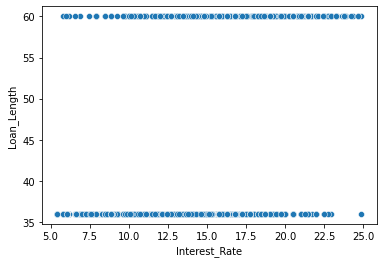

In [220]:
sns.scatterplot(loan_data.Interest_Rate,loan_data.Loan_Length)
plt.show()

In [221]:
#c. Interest rate varies for different purpose of loans

In [222]:
encode={'Loan_Purpose':{'debt_consolidation':1,'credit_card':2,'other':3,
                        'home_improvement':4,'major_purchase':5,'small_business':6,'car':7,'wedding':8,'medical':9,'moving':10,'vacation':11,'house':12,'educational':13,'renewable_energy':14}}

In [223]:
Loan_df=loan_data.loc[:,['Loan_Purpose','Interest_Rate']]
Loan_df=Loan_df.replace(encode)
Loan_df

,Loan_Purpose,Interest_Rate
0,1,8.90
1,1,12.12
2,1,21.98
3,1,9.99
4,2,11.71
...,...,...
2495,1,16.77
2496,4,14.09
2497,1,13.99
2498,5,12.42


In [282]:
# filter the data for Loan Purpose
l1=Loan_df.loc[Loan_df.Loan_Purpose==1,'Interest_Rate']
l2=Loan_df.loc[Loan_df.Loan_Purpose==2,'Interest_Rate']
l3=Loan_df.loc[Loan_df.Loan_Purpose==3,'Interest_Rate']
l4=Loan_df.loc[Loan_df.Loan_Purpose==4,'Interest_Rate']
l5=Loan_df.loc[Loan_df.Loan_Purpose==5,'Interest_Rate']
l6=Loan_df.loc[Loan_df.Loan_Purpose==6,'Interest_Rate']
l7=Loan_df.loc[Loan_df.Loan_Purpose==7,'Interest_Rate']
l8=Loan_df.loc[Loan_df.Loan_Purpose==8,'Interest_Rate']
l9=Loan_df.loc[Loan_df.Loan_Purpose==9,'Interest_Rate']
l10=Loan_df.loc[Loan_df.Loan_Purpose==10,'Interest_Rate']
l11=Loan_df.loc[Loan_df.Loan_Purpose==11,'Interest_Rate']
l12=Loan_df.loc[Loan_df.Loan_Purpose==12,'Interest_Rate']
l13=Loan_df.loc[Loan_df.Loan_Purpose==13,'Interest_Rate']
l14=Loan_df.loc[Loan_df.Loan_Purpose==14,'Interest_Rate']
print('|The mean of l1: ',l1.mean(),'|The mean of l1: ',l1.mean(),'|The mean of l2: ',l2.mean(),'|The mean of l3: ',l3.mean(),'|The mean of l4: ',l4.mean(),'|The mean of l5: ',l5.mean(),'|The mean of l6: ',l6.mean(),'|The mean of l7: ',l7.mean(),'|The mean of l8: ',l8.mean(),'|The mean of l9: ',l9.mean(),'|The mean of l10: ',l10.mean(),'|The mean of l11: ',l11.mean(),'|The mean of l12: ',l12.mean(),'|The mean of l13: ',l13.mean() ,'|The mean of l14: ',l14.mean())

#H0: Interest rate doesnt varies for different purpose of loans
#Ha: Interest rate  varies for different purpose of loans

# CI = 95%, p = 0.05
# perform the test
stats.f_oneway(l1,l2,l3,l4,l5,l6,l7,l8,l9,l10,l11,l12,l13,l14)

# based on p values, p value of the test is small compared to cutoff p at 95%; 
# thus we will reject the H0

# business conclusion
#therefore there is variation in interest rate for different purpose of loan, claim is made at the CI of 95%


|The mean of l1:  13.588353751914264 |The mean of l1:  13.588353751914264 |The mean of l2:  13.050654627539478 |The mean of l3:  13.159552238805967 |The mean of l4:  11.594276315789479 |The mean of l5:  10.797821782178215 |The mean of l6:  12.839195402298845 |The mean of l7:  11.113000000000001 |The mean of l8:  12.047105263157897 |The mean of l9:  11.649666666666668 |The mean of l10:  13.621034482758622 |The mean of l11:  11.966190476190476 |The mean of l12:  13.448000000000002 |The mean of l13:  11.007333333333332 |The mean of l14:  9.8775


F_onewayResult(statistic=7.486710128328653, pvalue=1.1349601779818787e-14)

In [225]:
#d. There is relationship between FICO scores and Home Ownership. It means that, People with owning home will have high FICO scores.

In [283]:
ddf=loan_data.loc[loan_data.Home_Ownership=='OWN',['Home_Ownership','FICO_Range']]
cross=ddf.groupby(['FICO_Range'])['Home_Ownership'].count().reset_index()
cross

,FICO_Range,Home_Ownership
0,640-644,1
1,660-664,17
2,665-669,18
3,670-674,13
4,675-679,11
5,680-684,9
6,685-689,10
7,690-694,10
8,695-699,10
9,700-704,12


In [228]:
cross.loc[0:9,['FICO_Range']]=[1]
cross.loc[9:21,['FICO_Range']]=[2]
cross.loc[21:33,['FICO_Range']]=[3]
cross

,FICO_Range,Home_Ownership
0,1,1
1,1,17
2,1,18
3,1,13
4,1,11
5,1,9
6,1,10
7,1,10
8,1,10
9,2,12


In [229]:
#H0: there is relationship between FICO score and home ownership
#Ha:  there is no relationship between FICO score and home ownership

# CI = 95%, p = 0.05
# perform the test
stats.f_oneway(cross.FICO_Range,cross.Home_Ownership)

# based on p values, p value of the test is small compared to cutoff p at 95%; 
# thus we will reject the H0

# business conclusion

#therefore there is no significant relationship between FICO score and home ownership,claim is made at the C.I of 95%

F_onewayResult(statistic=21.37277185335098, pvalue=1.8859075785241008e-05)

### BUSINESS PROBLEM-2

In [230]:
price_quote=pd.read_csv('/Users/arunbiretheesh/Desktop/DATA SCIENCE/CASE STUDY/Basic Statistics - Hypothesis Testing/Price_Quotes.csv')

In [231]:
price_quote

,Order_Number,Barry_Price,Mary_Price
0,1,126,114
1,2,110,118
2,3,138,114
3,4,142,111
4,5,146,129
5,6,136,119
6,7,94,97
7,8,103,104
8,9,140,127
9,10,152,133


In [232]:
#BUSINESS PROBLEM: We would like to assess if there is any difference in the average price quotes provided by Mary and Barry.

In [233]:
Barry=price_quote.Barry_Price.mean()
Mary=price_quote.Mary_Price.mean()
print('The average of Barry price Quote is: ',Barry,'\n The average of Mary price Quote is: ',Mary )

The average of Barry price Quote is:  124.33333333333333 
 The average of Mary price Quote is:  114.75


In [279]:
#H0: U1=U2
#Ha: U1<>U2
 
# CI = 95%, p = 0.05
# perform the test

stats.ttest_rel(price_quote.Barry_Price,price_quote.Mary_Price)

# based on p values, p value of the test is small compared to cutoff p at 95%; 
# thus we will  reject the H0

#Business conclusion
#Therefore there is significant difference in the average price quotes provided by Mary and Barry,claim is made at the CI of 95%.
    

Ttest_relResult(statistic=2.521376510892349, pvalue=0.02840588045242053)

### BUSINESS PROBLEM-3

In [235]:
treatment=pd.read_csv('/Users/arunbiretheesh/Desktop/DATA SCIENCE/CASE STUDY/Basic Statistics - Hypothesis Testing/Treatment_Facility.csv')

In [236]:
treatment.rename(columns={'VAR4':'TRFF','VAR5':'CI'},inplace=True)

In [237]:
treatment

,Month,Reengineer,Employee_Turnover,TRFF,CI
0,1,Prior,0.0000,24.390244,42.682927
1,2,Prior,6.0606,19.354839,25.806452
2,3,Prior,12.1212,35.087719,146.198830
3,4,Prior,3.3333,18.404908,110.429448
4,5,Prior,12.9032,17.964072,23.952096
5,6,Prior,9.6774,41.176471,47.058824
6,7,Prior,11.7647,13.422819,0.000000
7,8,Prior,11.4286,31.250000,25.000000
8,9,Prior,23.0769,17.241379,132.183908
9,10,Prior,15.0000,16.574586,16.574586


In [238]:
#BUSINESS PROBLEM: Determine what effect, if any, the reengineering effort had on the incidence behavioral problems and staff turnover. i.e To determine if the reengineering effort
#changed the critical incidence rate. Isthere evidence that the critical incidence rate improved?

In [239]:
prior=treatment.loc[treatment.Reengineer=='Prior',['CI']]
post=treatment.loc[treatment.Reengineer=='Post',['CI']]
print('the average of CI before reengineering effort:',prior.mean(),'\n |the average of CI after reengineering effort:',post.mean())

the average of CI before reengineering effort: CI    53.887906
dtype: float64 
 |the average of CI after reengineering effort: CI    23.349719
dtype: float64


In [240]:
#H0: critical incident rate has not improved
#Ha: critical incident rate has improved

# CI = 95%, p = 0.05
# perform the test

stats.ttest_ind(prior,post)

# based on p values, p value of the test is high compared to cutoff p at 95%; 
# thus we will fail to reject the H0

#Business conclusion
#therefore the critical incident rate has not improved after the reengineering effort,claim is made at C.I of 95%

Ttest_indResult(statistic=array([1.62791443]), pvalue=array([0.12091989]))

### BUSINESS PROBLEM-4

In [241]:
priority=pd.read_csv('/Users/arunbiretheesh/Desktop/DATA SCIENCE/CASE STUDY/Basic Statistics - Hypothesis Testing/Priority_Assessment.csv')

In [242]:
high=priority.loc[priority.Priority=='High',['Days']]
medium=priority.loc[priority.Priority=='Medium',['Days']]
low=priority.loc[priority.Priority=='Low',['Days']]
print('The average days to complete High priority jobs: ',high.mean(),'\nThe average days to complete medium priority jobs: ',medium.mean(),'\nThe average days to complete low priority jobs: ',high.mean())

The average days to complete High priority jobs:  Days    3.02362
dtype: float64 
The average days to complete medium priority jobs:  Days    2.5
dtype: float64 
The average days to complete low priority jobs:  Days    3.02362
dtype: float64


In [243]:
#H0: high<>medium<>low
#Ha: high>medium>low


# CI = 95%, p = 0.05
# perform the test
stats.f_oneway(high,medium,low)

# based on p values, p value of the test is high compared to cutoff p at 95%; 
# thus we will fail to reject the H0

#Business conclusion
#therefore the job are not completed on the prioritizing order(high>medium>low ),claim is made at C.I of 95%


F_onewayResult(statistic=array([1.81231101]), pvalue=array([0.16411459]))

### BUSINESS PROBLEM-5

In [244]:
films=pd.read_csv('/Users/arunbiretheesh/Desktop/DATA SCIENCE/CASE STUDY/Basic Statistics - Hypothesis Testing/Films.csv')

In [245]:
films.head()

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,3.0,1.0,5
1,0,Ferris Buellers Day Off,Female,Single,1.0,1.0,1.0,1.0,2.0,1.0,5
2,0,Ferris Buellers Day Off,Male,Married,2.0,4.0,3.0,2.0,4.0,1.0,5
3,0,Ferris Buellers Day Off,Female,Married,1.0,3.0,2.0,2.0,4.0,1.0,5
4,0,Ferris Buellers Day Off,Female,Married,1.0,1.0,1.0,1.0,3.0,3.0,1


In [246]:
films.loc[films.Marital_Status=='Slngle',['Marital_Status']]=['Single']
films.loc[films.Marital_Status=='1',['Marital_Status']]=['Married']
films.loc[films.Marital_Status=='2',['Marital_Status']]=['Single']

In [247]:
films.loc[films.Gender=='1',['Gender']]=['Male']
films.loc[films.Gender=='2',['Gender']]=['Female']

In [248]:
# What isthe overall level of customer satisfaction?

Text(0.5, 1.0, 'The overall level of customer satisfication')

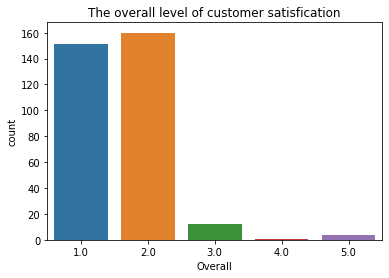

In [275]:
#Distribution of overall Satisfication
sns.countplot(x='Overall',data=films)
plt.title('The overall level of customer satisfication')

### The overall level of customer satisfication is very High with majority of the respondent reported either Excellent or Good

In [251]:
#What factors are linked to satisfaction?

In [274]:
films.head()

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,31-60,"<$50,000",5
1,0,Ferris Buellers Day Off,Female,Single,1.0,1.0,1.0,1.0,13-30,"<$50,000",5
2,0,Ferris Buellers Day Off,Male,Married,2.0,4.0,3.0,2.0,60+,"<$50,000",5
3,0,Ferris Buellers Day Off,Female,Married,1.0,3.0,2.0,2.0,60+,"<$50,000",5
4,0,Ferris Buellers Day Off,Female,Married,1.0,1.0,1.0,1.0,31-60,"=$100,000+",1


In [278]:
sin_over=pd.crosstab(films.Sinage,films.Overall)
#H0:No Relationship 
#H0:Relationship exist
# CI = 95%, p = 0.05
# perform the test
stats.chi2_contingency(observed=sin_over)
# based on p values, p value of the test is small compared to cutoff p at 95%; 
# thus we will reject the H0

#Business conclusion
#Therefore the factor 'Sinage' linked to overall satisfication,claim is made at C.I of 95%

(124.81695331531306,
 6.47639805161236e-19,
 16,
 array([[5.18348624e+01, 5.52905199e+01, 4.14678899e+00, 3.45565749e-01,
         1.38226300e+00],
        [7.11009174e+01, 7.58409786e+01, 5.68807339e+00, 4.74006116e-01,
         1.89602446e+00],
        [2.20183486e+01, 2.34862385e+01, 1.76146789e+00, 1.46788991e-01,
         5.87155963e-01],
        [2.75229358e+00, 2.93577982e+00, 2.20183486e-01, 1.83486239e-02,
         7.33944954e-02],
        [2.29357798e+00, 2.44648318e+00, 1.83486239e-01, 1.52905199e-02,
         6.11620795e-02]]))

In [254]:
park_over=pd.crosstab(films.Parking,films.Overall)
#H0:No Relationship 
#H0:Relationship exist
# CI = 95%, p = 0.05
# perform the test
stats.chi2_contingency(observed=park_over)
# based on p values, p value of the test is small compared to cutoff p at 95%; 
# thus we will reject the H0

#Business conclusion
#Therefore the factor 'Parking' linked to overall satisfication,claim is made at C.I of 95%


(229.4794365763204,
 8.162450437898108e-40,
 16,
 array([[6.18776758e+01, 6.51559633e+01, 4.91743119e+00, 4.09785933e-01,
         1.63914373e+00],
        [7.06513761e+01, 7.43944954e+01, 5.61467890e+00, 4.67889908e-01,
         1.87155963e+00],
        [1.33914373e+01, 1.41009174e+01, 1.06422018e+00, 8.86850153e-02,
         3.54740061e-01],
        [3.23241590e+00, 3.40366972e+00, 2.56880734e-01, 2.14067278e-02,
         8.56269113e-02],
        [1.84709480e+00, 1.94495413e+00, 1.46788991e-01, 1.22324159e-02,
         4.89296636e-02]]))

In [255]:
clean_over=pd.crosstab(films.Clean,films.Overall)
#H0:No Relationship 
#H0:Relationship exist
# CI = 95%, p = 0.05
# perform the test
stats.chi2_contingency(observed=clean_over)
# based on p values, p value of the test is small compared to cutoff p at 95%; 
# thus we will reject the H0

#Business conclusion
#Therefore the factor 'Clean' linked to overall satisfication,claim is made at C.I of 95%

(125.17708834561675,
 5.517448379868074e-19,
 16,
 array([[6.64954128e+01, 7.00183486e+01, 5.28440367e+00, 4.40366972e-01,
         1.76146789e+00],
        [7.01896024e+01, 7.39082569e+01, 5.57798165e+00, 4.64831804e-01,
         1.85932722e+00],
        [1.10825688e+01, 1.16697248e+01, 8.80733945e-01, 7.33944954e-02,
         2.93577982e-01],
        [2.30886850e+00, 2.43119266e+00, 1.83486239e-01, 1.52905199e-02,
         6.11620795e-02],
        [9.23547401e-01, 9.72477064e-01, 7.33944954e-02, 6.11620795e-03,
         2.44648318e-02]]))

### Therefore Sinage,Parking and Clean are the factors linked to satisfaction.

In [256]:
#What is the demographic profile of Film on the Rocks patrons?

In [257]:
films.loc[films.Age==1,['Age']]=['1-12']
films.loc[films.Age==2,['Age']]=['13-30']
films.loc[films.Age==3,['Age']]=['31-60']
films.loc[films.Age==4,['Age']]=['60+']

In [258]:
films.loc[films.Marital_Status==1,['Marital_Status']]=['Married']
films.loc[films.Marital_Status==2,['Marital_Status']]=['Single']

In [259]:
films.loc[films.Income==1,['Income']]=['<$50,000']
films.loc[films.Income==2,['Income']]=['$50-$100,000']
films.loc[films.Income==3,['Income']]=['=$100,000+']

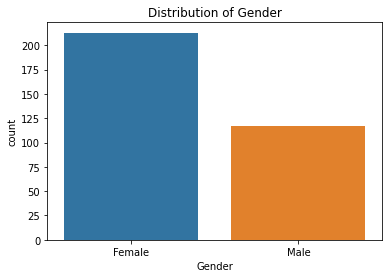

In [262]:
# See the distribution of gender to recognize different distributions
sns.countplot(x='Gender', data=films);
plt.title('Distribution of Gender');

### There are  more women than men in this data set.They will perhaps be a significant element in your customer segmentation efforts later.


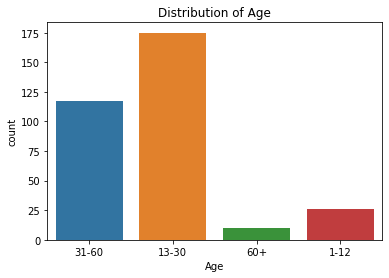

In [264]:
# Countplot for age distribution
sns.countplot(x='Age',data=films)
plt.title('Distribution of Age');


### Ages are mostly between 13 and 30.

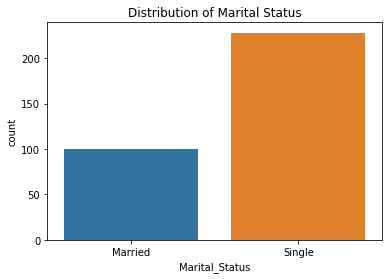

In [266]:
# Distribution of marital status 
sns.countplot(x='Marital_Status', data=films);
plt.title('Distribution of Marital Status');

### There are more customers who are Single than those who are married

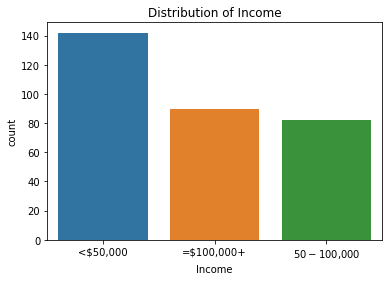

In [268]:
# Distribution of Income 
sns.countplot(x='Income', data=films);
plt.title('Distribution of Income');

### Most of the respondents have income less than $50,000.

In [270]:
#In what media outlet(s) should the film series be advertised?

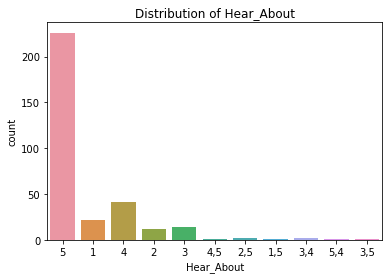

In [271]:
# Distribution of Hear_About:
sns.countplot(x='Hear_About', data=films);
plt.title('Distribution of Hear_About');


### Majority of those answering the question said they heard about the film series solely through word of mouth.
